# MATH 210 Introduction to Mathematical Computing

## April 1, 2022

* Review of matrices
* `scipy.linalg`
* Polynomial interpolation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Review of matrices

Create a matrix as a 2D NumPy array:

In [2]:
A = np.array([[1.,2.],[3.,4.],[5.,6.]])
A

array([[1., 2.],
       [3., 4.],
       [5., 6.]])

Check the number of dimensions of $A$ and the shape:

In [3]:
A.ndim

2

In [4]:
A.shape

(3, 2)

This means that $A$ is a 2-dimensional NumPy array with 3 rows and 2 columns.

Select a row from a matrix:

In [5]:
r0 = A[0,:]
r0

array([1., 2.])

Check the number of dimensions of $\mathbf{r}_0$ and the shape:

In [6]:
r0.ndim

1

In [7]:
r0.shape

(2,)

This means that $\mathbf{r}_0$ is a 1-dimensional array with 2 entries.

Select a column from a matrix:

In [8]:
c1 = A[:,1]
c1

array([2., 4., 6.])

Check the number of dimensions of $\mathbf{c}_1$ and the shape:

In [9]:
c1.ndim

1

In [10]:
c1.shape

(3,)

This means that $\mathbf{c}_1$ is a 1-dimensional array with 3 entries.

Matrix multiplication is given by the operator `@`:

In [11]:
A = np.array([[1.,2.],[3.,4.],[5.,6.]])
A

array([[1., 2.],
       [3., 4.],
       [5., 6.]])

In [12]:
B = np.array([[3.,-2.],[1.,2.]])
B

array([[ 3., -2.],
       [ 1.,  2.]])

In [13]:
A@B

array([[ 5.,  2.],
       [13.,  2.],
       [21.,  2.]])

## `scipy.linalg`

We will use the package `scipy.linalg` for linear algebra functions. The most important function is `scipy.linalg.solve` for solving linear systems.

In [14]:
import scipy.linalg as la

In [15]:
M = np.array([[3.,7.],[2.,8.]])
M

array([[3., 7.],
       [2., 8.]])

Compute the determinant:

In [16]:
la.det(M)

9.999999999999998

Compute the inverse:

In [17]:
Minv = la.inv(M)
Minv

array([[ 0.8, -0.7],
       [-0.2,  0.3]])

Verify that $M M^{-1} = I$ is the identity matrix.

In [18]:
M@Minv

array([[1.0000000e+00, 4.4408921e-16],
       [0.0000000e+00, 1.0000000e+00]])

Solve a linear system $A \mathbf{x} = \mathbf{b}$ using `la.solve(A,b)`.

In [19]:
A = np.array([[2.,-1.,0.],[-1.,2.,-1.],[0.,-1.,2.]])
A

array([[ 2., -1.,  0.],
       [-1.,  2., -1.],
       [ 0., -1.,  2.]])

In [20]:
b = np.array([1.,0.,1.])
b

array([1., 0., 1.])

In [21]:
x = la.solve(A,b)
x

array([1., 1., 1.])

Verify $A \mathbf{x} = \mathbf{b}$.

In [22]:
A@x

array([1., 0., 1.])

## Examples

Solve $A\mathbf{x} = \mathbf{b}$ for different $\mathbf{b}$ vectors where the matrix $A$ is given by
$$
A = 
\begin{bmatrix}
 2 & -1 &    &   & & \\
-1 &  2 & -1 &   & & \\
   & -1 &  2 & -1 & &  \\
   &    &    & \ddots & & \\
   &    & &  -1 & 2 &  -1 \\
   &    & &    & -1 &  2
\end{bmatrix}
$$

In [23]:
N = 5
A = 2*np.eye(N) - np.diag(np.ones(N-1),1) - np.diag(np.ones(N-1),-1)
A

array([[ 2., -1.,  0.,  0.,  0.],
       [-1.,  2., -1.,  0.,  0.],
       [ 0., -1.,  2., -1.,  0.],
       [ 0.,  0., -1.,  2., -1.],
       [ 0.,  0.,  0., -1.,  2.]])

In [24]:
b = np.ones(N)

In [25]:
x = la.solve(A,b)
x

array([2.5, 4. , 4.5, 4. , 2.5])

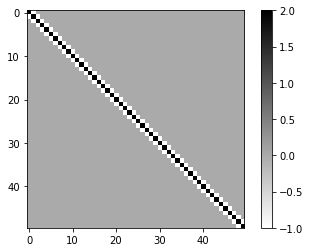

In [26]:
N = 50
A = 2*np.eye(N) - np.diag(np.ones(N-1),1) - np.diag(np.ones(N-1),-1)
plt.imshow(A,cmap='binary'), plt.colorbar()
plt.show()

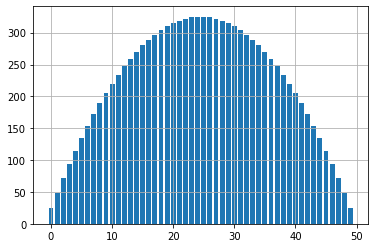

In [27]:
b = np.ones(N)
x = la.solve(A,b)
plt.bar(range(N),x), plt.grid(True)
plt.show()

## Polynomial interpolation

Let $d$ be a positive integer. Consider $d+1$ data points

$$
(t_0,y_0) \ , \ (t_1,y_1) \ , \ \dots \ , \ (t_d,y_d)
$$

such that $t_i \ne t_j$ ($i \ne j$). There is a unique polynomial $p(x)$ of degree (at most) $d$

$$
p(x) = c_0 + c_1 t + c_2 t^2 + \cdots + c_d t^d
$$

such that $p(t_n) = y_n$. We say $p(x)$ is an **interpolant** (or interpolating polynomial) for the data.

How do we compute the coefficients $c_0,c_1,\dots,c_d$? Each point gives an equation $p(t_n) = y_n$, $n=0,\dots,d$:

$$
\begin{array}{ccccccccccc}
c_0 & + & c_1 t_0 & + & c_2t_0^2 & + & \cdots & + & c_dt_0^d & = & y_0 \\
c_0 & + & c_1 t_1 & + & c_2t_1^2 & + & \cdots & + & c_dt_1^d & = & y_1 \\
& & \vdots & & & & & & \vdots & & \\
c_0 & + & c_1 t_d & + & c_2t_d^2 & + & \cdots & + & c_dt_d^d & = & y_d
\end{array}
$$

In matrix notation, this is $A \mathbf{c} = \mathbf{y}$ where

$$
A = \begin{bmatrix}
1 & t_0 & t_0^2 & \cdots & t_0^d \\
1 & t_1 & t_1^2 & \cdots & t_1^d \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & t_d & t_d^2 & \cdots & t_d^d
\end{bmatrix}
\hspace{15mm}
\mathbf{c} = \begin{bmatrix} c_0 \\ c_1 \\ \vdots \\ c_d \end{bmatrix}
\hspace{15mm}
\mathbf{y} = \begin{bmatrix} y_0 \\ y_1 \\ \vdots \\ y_d \end{bmatrix}
$$

The matrix $A$ is called the **Vandermonde** matrix. Therefore, we compute the coefficients of the interpolating polynomial $p(x)$ by solving the systems of equations $A \mathbf{c} = \mathbf{y}$.

In [28]:
np.vander([0,1,2,3,4],increasing=True)

array([[  1,   0,   0,   0,   0],
       [  1,   1,   1,   1,   1],
       [  1,   2,   4,   8,  16],
       [  1,   3,   9,  27,  81],
       [  1,   4,  16,  64, 256]])

In [29]:
y = np.array([0.,1.,0.]) # p(x) = -x(x - 2)
N = len(y)
t = np.arange(0,N)
A = np.vander(t,increasing=True)
c = la.solve(A,y)
c

array([ 0.,  2., -1.])

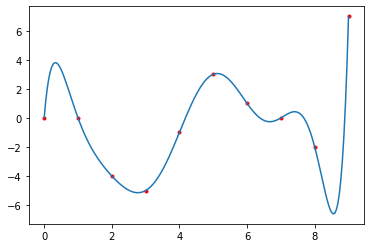

In [30]:
y = np.random.randint(-5,10,10)
N = len(y)
t = np.arange(0,N)
A = np.vander(t,increasing=True)
c = la.solve(A,y)
T = np.linspace(0,N-1,20*N)
Y = sum([c[n]*T**n for n in range(0,N)])
plt.plot(t,y,'r.',T,Y)
plt.show()